# Numerical Methods

# 2020/21 Class Assessment

The following gives sketches of solutions - code is reused from lectures in many places.

## Friday 7th May 2021

## 11:00 - 14:00 (UK time: BST= GMT+1)

## Test instructions


* This test contains FOUR questions with multiple parts, **all** of which should be answered.



* Write your solution in *markdown* (text and equations) and *code* (Python) cells under each question.



* [You may if you choose also submit parts of your answers via **scans of hand written pages** - feel free to use this option in particular for supplementary sketches or equations, you will not be marked down for not embedding equations into your markdown cells. But please make sure that the question number each sheet you scan refers to is very clear. Please use the Microsoft Office Lens solution you're using for exams.]



* You should provide an explanation of your solution as comments in your code and in the surrounding markdown cells as appropriate to answer the question and explain your steps.



* Unless explicitly told otherwise in the question you can reuse any code from the lectures and homeworks, you can also use any calls to standard libraries (e.g. NumPy, SciPy).



* **Save your work regularly**


* At the end of the test you should if necessary **Download your Jupyter notebook** (i.e. the file with a .ipynb extension), and **email your Jupyter notebook document**  and any **scans of hand written sheets** to [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott) at <mailto:m.d.piggott@imperial.ac.uk>.



* If there are any issues during the assessment period **please document these**, e.g. via photos, and as soon as possible email <mailto:m.d.piggott@imperial.ac.uk> to report the problem.



* If your email attachments together are larger than 10Mb please use <https://fileexchange.ic.ac.uk/>

This time-limited remote assessment is being run as an open-book examination. We have worked hard to create exams that assesses synthesis of knowledge rather than factual recall. Thus, access to the internet, notes or other sources of factual information in the time provided will not be helpful and may well limit your time to successfully synthesise the answers required. Where individual questions rely more on factual recall and may therefore be less discriminatory in an open book context, we may compare the performance on these questions to similar style questions in previous years and we may scale or ignore the marks associated with such questions or parts of the questions. The use of the work of another student, past or present, constitutes plagiarism. Giving your work to another student to use may also constitute an offence. Collusion is a form of plagiarism and will be treated in a similar manner. This is an individual assessment and thus should be completed solely by you. The College will investigate all instances where an examination or assessment offence is reported or suspected, using plagiarism software, vivas and other tools, and apply appropriate penalties to students. In all examinations we will analyse exam performance against previous performance and against data from previous years and use an evidence-based approach to maintain a fair and robust examination. As with all exams, the best strategy is to read the question carefully and answer as fully as possible, taking account of the time and number of marks available.

In [1]:
# you may import any libraries we used in lectures, e.g.

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy.interpolate as si
import scipy.linalg as sl
import scipy.optimize as sop

### Question 1 - differentiation and ODEs [25 marks]

<br>

**1.1  [10 marks]**

Consider the following function of a single independent variable $t$:

$$f(t) = \exp(t)$$

The forward difference approximation at the location (or time) $t$ is given by

$$ f'(t)\approx \frac{f(t+\Delta t)-f(t)}{\Delta t} $$

The backward difference approximation at $t$ is given by 

$$ f'(t)\approx \frac{f(t)-f(t - \Delta t)}{\Delta t} $$



For appropriately small (not too small) values of $\Delta t$ we expect both of these to provide accurate approximations to the value of the derivative of $f$ at $t$. Of course in this simple case the derivative of $f$ is also $\exp(t)$.

Write functions to evaluate these two approximations given an arbitratry function $f$, location $t$ and $\Delta t$ value, and test them by performing an error/convergence analysis for the function $f(t)$ given above at the location $t=1$. 

Include appropriate plots of the errors against the step size $\Delta t$, and provide estimates of the order of convergence of the two approximations. What do you observe?

<br>

**1.2 [7 marks]**

The Taylor series expansion of a function $f$ about a point $t_0$ can be written as 

\begin{align*}
f(t) & \approx f(t_0) + (t-t_0) f'(t_0) + \frac{(t-t_0)^2}{2!}f''(t_0) + \frac{(t-t_0)^3}{3!}f'''(t_0) + \ldots
\end{align*}

Use this expansion about $t_0=0$ to provide an approximation to the function $f(t) = \exp(t)$ in the form of a polynomial in $t$.

Use this expansion to derive three approximations to the derivative function $f'(t)$ by differentiating the expansion and then excluding the terms that include powers of $t$ greater than 2, 3 and 4, i.e. by selecting where you truncate the expansion.

How does the resulting error in the approximation to $f'(1)$ that these approximation provide vary with the number of terms that you include in the truncated expansion, and how does this contrast with the behaviour from question 1.1?

<br>

**1.3 [8 marks]**

Now consider the ODE problem 

$$ \frac{dy}{dt} = \exp(t), \;\;\;\;\;\; y(0) = 1, $$ 

which has the exact solution $y(t) = \exp(t)$.

The forward Euler method is given by

$$ y(t+\Delta t) = y(t)+ \Delta t f(t)$$

while the backward Euler method is given by

$$ y(t+\Delta t) = y(t)+ \Delta t f(t+\Delta t)$$

For a given $\Delta t$ these can be used to provide an approximation to how the exact solution varies with $t$.

Write functions to implement these two time-stepping methods and by solving the given ODE problem from $t=0$ up to $t=1$ verify your implementations by performing a convergence analysis against the exact solution.

By performing one or two time steps of the two methods (in code or by hand) describe qualtiatively how the numerical solution diverges from the true function as $t$ increases for the two methods. 
Based upon what you observe, derive and implement a third method based upon appropriately combining the forward and the backward Euler methods; demonstrate clearly any improvement you are able to achieve.

## Solution

Exact derivative =  2.718281828459045
  Forward difference                     Backward difference
   3.52681 (error=      0.81)            2.13912 (error=      0.58)
   3.08824 (error=      0.37)            2.40513 (error=      0.31)
   2.89548 (error=      0.18)            2.55525 (error=      0.16)
   2.80503 (error=     0.087)            2.63508 (error=     0.083)
    2.7612 (error=     0.043)            2.67625 (error=     0.042)
   2.73963 (error=     0.021)            2.69716 (error=     0.021)
   2.72893 (error=     0.011)            2.70769 (error=     0.011)
    2.7236 (error=    0.0053)            2.71298 (error=    0.0053)
   2.72094 (error=    0.0027)            2.71563 (error=    0.0027)
   2.71961 (error=    0.0013)            2.71695 (error=    0.0013)


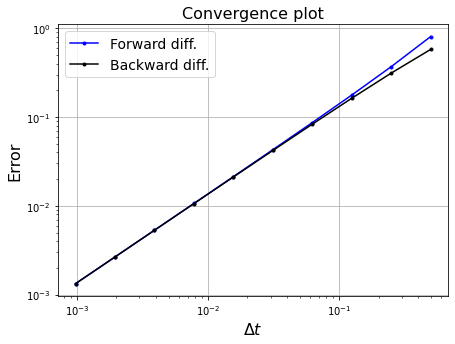

In [2]:
def forward_diff(f, t, dt):
    # this is my function answering question 1.1
    return (f(t + dt)- f(t)) / dt


def backward_diff(f, t, dt):
    return (f(t) - f(t - dt)) / dt


def fun(t):
    return np.exp(t)

# for this example we know trivially what the exact solution should be
t = 1
exact = np.exp(t)


print('Exact derivative = ', exact)
# headers for the following errors outputs
print('%20s%40s' % ('Forward difference', 'Backward difference'))

# we're going to store all the values for plotting, initialise variable for these
fd_errors = []
bd_errors = []
dt_all = []
dt = 0.5  # an initial mesh spacing
for i in range(10):
    fd = forward_diff(fun, t, dt)
    bd = backward_diff(fun, t, dt)
    print('%10g (error=%10.2g)         %10g (error=%10.2g)' %
          (fd, abs(fd - exact), bd, abs(bd - exact)))
    # store the dt values and the errors
    dt_all.append(dt)
    fd_errors.append(abs(fd - exact))
    bd_errors.append(abs(bd - exact))
    dt = dt / 2  # halve h for the next iteration

# as we expect a polynomial relationship between dx and the errors,
# a log-log plot will demonstrate this if we get straight lines
# the slopes of these lines indicating the order of the relationship:
# slope 1 for forward diff and slope 2 for central diff

# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

ax1.loglog(dt_all, fd_errors, 'b.-', label='Forward diff.')
ax1.loglog(dt_all, bd_errors, 'k.-', label='Backward diff.')
ax1.set_xlabel('$\Delta t$', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

Our Taylor series expansion about $t_0=0$ reads


\begin{align}
f(t)&=\exp(t) \\
&= \exp(0) + t \exp(0) + t^2/2! \exp(0) + t^3/3! \exp(0) + t^4/4! \exp(0) + t^5/5! \exp(0) + \ldots \\
&= 1 + t + t^2/2 + t^3/6 + t^4/24 + t^5/120 + \ldots
\end{align}

an approximation to the derivative w.r.t. $t$ is therefore

\begin{align}
f'(t) = 0  + 1 + 2t/2 + 3t^2/6 + 4t^3/24 + 5t^4/120 + \ldots
\end{align}

and by truncating at different points we have three different approximations to $f'(1)$:

\begin{align}
f'(1) =   1 + 2\times 1/2 + 3\times 1^2/6 
\end{align}

\begin{align}
f'(1) =   1 + 2\times 1/2 + 3\times 1^2/6 + 4\times 1^3/24 
\end{align}

\begin{align}
f'(1) =   1 + 2\times 1/2 + 3\times 1^2/6 + 4\times 1^3/24 + 5\times 1^4/120 
\end{align}

and so on

[0.71828183 0.21828183 0.05161516 0.0099485 ]


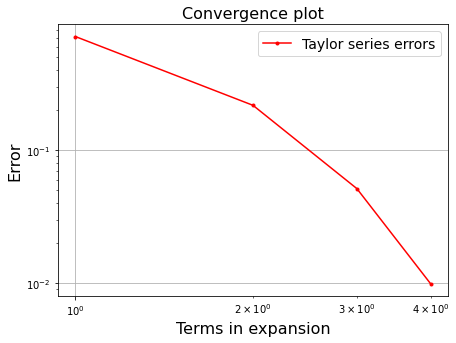

In [8]:
# for this example we know trivially what the exact solution should be
t = 1
exact = np.exp(t)

Tayor_approxs = [1. + 2*(1)/2, 
                 1. + 2*(1)/2 + 3* (1**2)/6, 
                 1. + 2*(1)/2 + 3* (1**2)/6 + 4* (1**3)/24,
                 1. + 2*(1)/2 + 3* (1**2)/6 + 4* (1**3)/24 + 5* (1**4)/120]

Taylor_errors = np.abs(Tayor_approxs - exact)

print(Taylor_errors)

Taylor_f_evals = [1, 2, 3, 4]

# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

ax1.loglog(Taylor_f_evals, Taylor_errors, 'r.-', label='Taylor series errors')
ax1.set_xlabel('Terms in expansion', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

The main difference in the convergance is that as we add more terms the errors go down faster, i.e. each extra term reduces the error far more substantially (for this problem) than we see as we halve the $dt$ values in the finite difference approximations.

In [80]:
# forward and backward euler implementations are straightforward 
# backward is trivial since the function only depends on t
# by sketching out a few time steps one can observe that the
# forward euler trajectory is too small - it maps out a line below the exact solutuon
# backward euler in contrast is too large - it maps our a line above
# the amount above and below are very similar, and this points to taking an
# average of the two

def f(t):
    return np.exp(t)

def y_ex(t):
    return np.exp(t)

def forward_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t)
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def backward_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t+dt) 
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def for_back_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*0.5*(f(t) + f(t+dt)) 
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

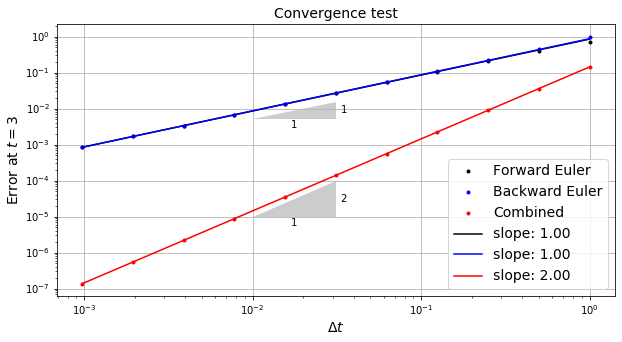

In [81]:
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

# problem parameters
t0 = 0.0
y0 = 1.0
t_max = 1.

def approx_error(dt, t_max):
    yall, tall = forward_euler(f, y0, t0, t_max, dt)
    err1 = abs(yall[-1] - y_ex(t_max))
    yall, tall = backward_euler(f, y0, t0, t_max, dt)
    err2 = abs(yall[-1] - y_ex(t_max))
    yall, tall = for_back_euler(f, y0, t0, t_max, dt)
    err3 = abs(yall[-1] - y_ex(t_max))
    return err1, err2, err3


error_fe = []
error_be = []
error_fbe = []
dt_array = []

dt = 1.
while dt > 5.e-4:
    dt_array.append(dt)
    err1, err2, err3 = approx_error(dt, t_max)
    error_fe.append(err1)
    error_be.append(err2)
    error_fbe.append(err3)
    dt *= 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.loglog(dt_array, error_fe, 'k.', label='Forward Euler')
ax1.loglog(dt_array, error_be, 'b.', label='Backward Euler')
ax1.loglog(dt_array, error_fbe, 'r.', label='Combined')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.set_title('Convergence test', fontsize=14)
ax1.grid(True)

# use numpy.polyfit to find best fit linear line to data

# what does this parameter do, and what happens if you choose equal to a smaller value
start_fit = 4

line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
line_fit_be = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_be[start_fit:]), 1)
line_fit_fbe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fbe[start_fit:]), 1)

ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax1.loglog(dt_array, np.exp(line_fit_be[1]) * dt_array**(line_fit_be[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_be[0]))
ax1.loglog(dt_array, np.exp(line_fit_fbe[1]) * dt_array**(line_fit_fbe[0]), 'r-', label = 'slope: {:.2f}'.format(line_fit_fbe[0]))

annotation.slope_marker((1e-2, 5e-3), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((1e-2, 1e-5), (2, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

ax1.legend(loc='best', fontsize=14)

So as can clearly be seen the errors in the new combined method are singificantly smaller than either FE or BE.

### Question 2 - integration/quadrature [25 marks]

<br>

**2.1 [10 marks]**

Recall that the trapezoidal quadrature rule can be written as

$$I_T := \sum_{i=0}^{n-1}\, \left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )\, (x_{i+1}-x_i). $$

This provides an approximation to the integral of the function $f(x)$ over the interval spanned
by the equally spaced $x_i$ locations, i.e. 

$$I_T\approx \int_{x_0}^{x_n} f(x)\, dx.$$

Derive mathematically and implement in code the composite version of this rule, i.e. one which minimises the number of times that $f$ needs to be evaluated. Verify your implementation by checking for convergence using the problem

$$\int_0^1 \exp(x)\, dx = \exp(1) - \exp(0) = \exp(1) - 1$$

<br>

**2.2  [10 marks]**

Since the Trapezoidal rule is second order, i.e. the error reduces by a factor of 4 if we double the number of intervals (equivalently make the interval size half the size), then we can combine the results from two evaluations of the trapezoidal rule and two different $\Delta x$ values in order to cancel the leading order error term and arrive at a more accurate result.

Using the notation $I_T$ for the output of the trapezoidal rule with $n$ intervals, and $I_{T_2}$ for the output with $2n$ intervals, explain why the result

$$I = \frac{1}{3}\left( 4I_{T_2} - I_T \right)$$

can be expected to yield a more accurate approximation to the integral than either $I_T$ or $I_{T_2}$ alone. 

Using the test case function from 2.1, implement this method and demonstrate its improved accuracy.

<br>

**2.3  [5 marks]**

Starting from the mathematical form of the composite trapezoidal rule, demonstrate that the new rule 

$$I = \frac{1}{3}\left( 4I_{T_2} - I_T \right)$$

from part 2.2 is actually equivalent to Simpson's rule.

## Solution

Let's expand out the rule and collect $f$ terms evaluated at the same $x$ location

$$I_T  = \sum_{i=0}^{n-1}\,   \left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )\, (x_{i+1}-x_i), $$

is equivalent to

$$
\begin{align}
I_T &= \frac{\Delta x}{2}[f(x_0) + 2f(x_1) + 2f(x_2) + \ldots + 2f(x_{n-1}) + f(x_n)]\\[8pt]
& = \Delta x \left[ \frac{1}{2}f(x_0) + \left\{ \sum_{i=1}^{n-1}\,f(x_{i})  \right\} + \frac{1}{2}f(x_n) \right]
\end{align}
$$

To implement this we can do the inner sum and then add on half the two outer most values, and finally multiply by the interval size.

In [82]:
# test problem

def f(x):
    """The function we wish to integrate"""
    return np.exp(x)

a = 0
b = 1

exact_integral = np.exp(1) - 1

In [83]:
# this is the naive non-composite version
def trapezoidal_rule(a, b, function, number_intervals=10):
    """Our implementation of the trapezoidal quadrature rule.
    
    Note that as discussed in the lecture this version of the implementation 
    performs redundant function evaluations - see the composite implementation 
    in the homework for a more efficient version.
    """
    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_T = 0.0

    # Loop to create each trapezoid
    # note this function takes a slightly different approach to Midpoint 
    # (a for loop rather than a while loop) to achieve the same thing
    for i in range(number_intervals):
        # Set the start of this interval 
        this_bin_start = a + (interval_size * i)
        # Find the area of the current trapezoid and add it to the running total
        I_T += interval_size * \
                (function(this_bin_start)+function(this_bin_start+interval_size))/2.0

    # Return our running total result
    return I_T

In [84]:
print("The exact area found by direct integration = ", exact_integral)
for i in (1, 2, 10, 100, 1000):
    area = trapezoidal_rule(a, b, f, i)
    print("Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-exact_integral)))


The exact area found by direct integration =  1.718281828459045
Area 1 rectangle(s) = 1.85914 (error=0.140859)
Area 2 rectangle(s) = 1.75393 (error=0.0356493)
Area 10 rectangle(s) = 1.71971 (error=0.00143166)
Area 100 rectangle(s) = 1.7183 (error=1.4319e-05)
Area 1000 rectangle(s) = 1.71828 (error=1.4319e-07)


The exact area found by direct integration =  1.718281828459045
Area 1    trapezoid(s) = 1.8591409142295225 (error = 1.408590857704774546e-01)
Area 2    trapezoid(s) = 1.7539310924648255 (error = 3.564926400578039001e-02)
Area 4    trapezoid(s) = 1.7272219045575166 (error = 8.940076098471472221e-03)
Area 8    trapezoid(s) = 1.7205185921643018 (error = 2.236763705256716861e-03)
Area 16   trapezoid(s) = 1.7188411285799945 (error = 5.593001209494019577e-04)
Area 32   trapezoid(s) = 1.7184216603163271 (error = 1.398318572820578254e-04)
Area 100  trapezoid(s) = 1.7182961474504177 (error = 1.431899137260828070e-05)
Area 1000 trapezoid(s) = 1.7182819716491959 (error = 1.431901508475164064e-07)


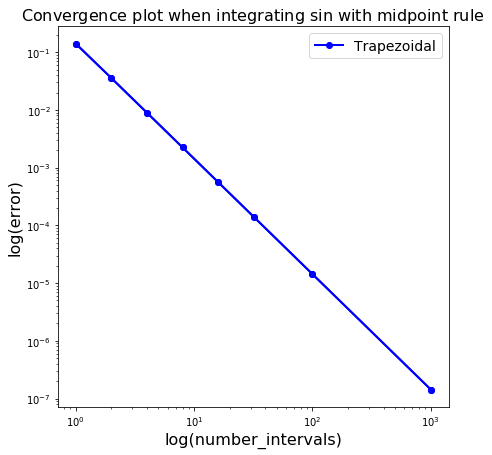

In [85]:
# Now let's test the trapezoidal function.
print("The exact area found by direct integration = ", exact_integral)
interval_sizes_T = [1, 2, 4, 8, 16, 32, 100, 1000]
areas_T = np.zeros_like(interval_sizes_T, dtype='float64')
errors_T = np.zeros_like(interval_sizes_T, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_T):
    areas_T[i] = trapezoidal_rule(a, b, f, number_intervals)
    errors_T[i] = abs(areas_T[i] - exact_integral)
    print('Area {:<4d} trapezoid(s) = {:.16f} (error = {:.18e})'.format(
        number_intervals, areas_T[i], errors_T[i]))

# plot
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2)
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Convergence plot when integrating $\sin$ with midpoint rule', fontsize=16)
ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2, label='Trapezoidal')
ax1.legend(loc='best', fontsize=14)

In [86]:
# this is the composite version

def composite_trapezoidal_rule(a, b, function, number_intervals=10):
    """Our implementation of the trapezoidal quadrature rule - composite version"""
    interval_size = (b - a)/number_intervals
    assert interval_size > 0
    assert type(number_intervals) == int
    I_T = 0.0
    # add half the left most value
    I_T += function(a)/2.0
    # sum from 1 to n-1
    for i in range(1, number_intervals):
        I_T += function(a + i * interval_size)
    # add ha;f the right most value
    I_T += function(b)/2.0
    # Return our running total result multiplied by the interval size
    return I_T * interval_size

In [87]:
print("The exact area found by direct integration = ", exact_integral)
for i in (1, 2, 10, 100, 1000):
    area = composite_trapezoidal_rule(a, b, f, i)
    print("Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area - exact_integral)))

The exact area found by direct integration =  1.718281828459045
Area 1 rectangle(s) = 1.85914 (error=0.140859)
Area 2 rectangle(s) = 1.75393 (error=0.0356493)
Area 10 rectangle(s) = 1.71971 (error=0.00143166)
Area 100 rectangle(s) = 1.7183 (error=1.4319e-05)
Area 1000 rectangle(s) = 1.71828 (error=1.4319e-07)


Identical to above.

Now to justify that we expect

$$I = \frac{1}{3}\left( 4I_{T_2} - I_T \right)$$

to be a more accurate result that either $I_T$ or $I_{T_2}$.

If we consider the leading order error in $I_T$ to be $\alpha$, i.e.

$$I_T \approx I + \alpha + \text{smaller terms(1)}$$

and these "smaller terms" can be made arbitrarily small if $n$ is chosen large enough as they include various higher order powers of $\Delta x$, then by the second order error argument

$$I_{T_2} \approx I + \frac{1}{4}\alpha + \text{smaller terms(2)}$$

We want a new estimate for $I$ that does not include this $\alpha$ term.

If we multiply the second by 4 and subtract the first we can cancel:

$$ 4I_{T_2} - I_T \approx 3I + \text{smaller terms(3)}$$

where "smaller terms(3)" is some combination of the higher order terms that can still be made arbitrarily small if $\Delta x$ chosen small enough.  Dividing through by 3 gives us a new estimate of the integral where we have cancelled the leading order error term.

And it's easy to implement if we already have functions to compute the trap rule:

In [88]:
def extrapolated_trap_rule(a, b, function, number_intervals=10):
    """ Function to evaluate a new quadrature rule using
    appropriate calls to the composite trapezoidal function
    """
    T = composite_trapezoidal_rule(a, b, function, number_intervals)
    T2 = composite_trapezoidal_rule(a, b, function, number_intervals*2)

    return (4*T2 - T)/3.

In [89]:
for i in (1, 2, 4, 8, 16, 32, 64):
    area = extrapolated_trap_rule(a, b, f, i)
    print("Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-exact_integral)))

Area 1 rectangle(s) = 1.71886 (error=0.000579323)
Area 2 rectangle(s) = 1.71832 (error=3.70135e-05)
Area 4 rectangle(s) = 1.71828 (error=2.32624e-06)
Area 8 rectangle(s) = 1.71828 (error=1.45593e-07)
Area 16 rectangle(s) = 1.71828 (error=9.10273e-09)
Area 32 rectangle(s) = 1.71828 (error=5.68971e-10)
Area 64 rectangle(s) = 1.71828 (error=3.55607e-11)


Note the smaller errors and more rapid convergence.

Our starting point is the trapezoidal method

$$
\begin{align}
I_T &= [f(x_0) + 2f(x_1) + 2f(x_2) + \ldots + 2f(x_{n-1}) + f(x_n)]\frac{\Delta x}{2}\\
& = \Delta x \left[ \frac{1}{2}f(x_0) + \left\{ \sum_{i=1}^{n-1}\,f(x_{i})  \right\} + \frac{1}{2}f(x_n) \right]
\end{align}
$$

and specifically the second composite form.

Our new method is given by

$$I = \frac{1}{3}\left( 4I_{T_2} - I_T \right)$$

Let's consider two sets of $x$ variables - the base ones at the original resolution, and then the ones on the finer mesh, the finer mesh as we've halved the interval size include all the original ones as well as the extra points directly in between.

If we define our $\Delta x$ and our $x_i$ values on the finer mesh, then we have
\begin{align}
I_{T_2} &= {\Delta x} \left[ \frac{1}{2}f(x_0) + \left\{ \sum_{i=1}^{n-1}\,f(x_{i})  \right\} + \frac{1}{2}f(x_n) \right]
\end{align}

and then $I_T$ uses double the $\Delta x$ value, and only every other $x_i$ value, starting at $i=0$ at the left-most separate entry, with the inner summation starting at $i=2$ and ending with $i = n-2$, and then the final entry as per the left-most, which can be written as:

\begin{align}
I_T = 2 \Delta x \left[ \frac{1}{2}f(x_0) + \left\{ \sum_{i=1}^{n/2-1}\,f(x_{2i})  \right\} + \frac{1}{2}f(x_n) \right]
\end{align}



First consider the $f(x_0)$ terms in $( 4I_{T_2} - I_T )/3$:

$${\Delta x}\left( 4  \frac{1}{2}f(x_0) - 2 \frac{1}{2}f(x_0)  \right)/3 
= \frac{\Delta x}{3} f(x_0)$$

<br>

With a bit of thinking and the appropriate use of notation, this can be written as

\begin{align*}
I 
& = \frac{\Delta x}{3}\left[ f \left ( x_0\right ) + 4f \left ( x_1\right ) + 2f\left ( x_2\right ) + 4f \left ( x_3\right ) + \cdots + 2 f \left ( x_{n-2}\right )  + 4 f \left ( x_{n-1}\right ) +  f \left ( x_{n}\right ) \right]\\[5pt]
& = \frac{\Delta x}{3}\left[ f \left ( x_0\right ) + 2\sum_{i=1}^{n/2 - 1} f\left(x_{2i}\right) + 4\sum_{i=1}^{n/2} f\left(x_{2i-1}\right)  +  f \left ( x_{n}\right ) \right].
\end{align*}

which is indeed identical to Simpson's rule.

In [90]:
# compare errors against a straight implementation of Simpson

def simpsons_composite_rule(a, b, function, number_intervals=10):
    """Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.
    
    This implementation requires that the number of subintervals (number_intervals) be even
    """
    assert number_intervals % 2 == 0, "number_intervals is not even"

    interval_size = (b - a) / number_intervals
    # start with the two end member values
    I_cS2 = function(a) + function(b)

    # add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i * interval_size)

    # and those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)

In [91]:
for i in (2, 4, 8, 16, 32, 64, 128): # need to double the number for consistency with the extrapolated version
    area = simpsons_composite_rule(a, b, f, i)
    print("Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-exact_integral)))

Area 2 rectangle(s) = 1.71886 (error=0.000579323)
Area 4 rectangle(s) = 1.71832 (error=3.70135e-05)
Area 8 rectangle(s) = 1.71828 (error=2.32624e-06)
Area 16 rectangle(s) = 1.71828 (error=1.45593e-07)
Area 32 rectangle(s) = 1.71828 (error=9.10273e-09)
Area 64 rectangle(s) = 1.71828 (error=5.6897e-10)
Area 128 rectangle(s) = 1.71828 (error=3.55607e-11)


Note that these results/error agree with the extrapolated trapezoidal results above.

### Question 3 - interpolation and root-finding [25 marks]

<br>

**3.1 [12 marks]**

Consider the three $(x,y)$ data points

$$\{\;\;(0,1), \;\;(0.4, 0.1),\;\; (1,0.5)\}$$

Consider initially only the outer two points $\{(x_0,y_0),  (x_2,y_2)\}$.
Derive by hand the Lagrange polynomial that passes through these two points and show (e.g. through a plot) that your result agrees with the result you can obtain using SciPy.

Repeat for all three points.

<br>

**3.2 [3 marks]**

Give an example of four distinct data points that can be interpolated using a quadratic function.


<br>

**3.3 [10 marks]**

Consider now the root-finding problem applied to a quadratic function

$$f(x) = ax^2 + bx + c$$

Provide examples of quadratic functions (i.e. select values for $a$, $b$ and $c$) with zero, one and multiple real-valued roots.

In the case where they exist, use Newton's method to find the roots.

Using the quadratic example, explain and demonstrate how Newton's method can fail. 

## Solution

In the case with two data points  $\{(0,1), (1,0.5)\}$

The Lagrange basis polynomials are then

$$ \ell_0(x) = \frac{x - x_1}{x_0-x_1} =  \frac{x - 1}{0-1}  = 1-x $$

and

$$\ell_1(x) = \frac{x - x_0}{x_1-x_0} = \frac{x - 0}{1-0} = x, $$

and the Lagrange polynomial is

$$ y = L(x) = \ell_0(x)\,y_0 + \ell_1(x)\,y_1 = (1-x)\times 1 + x\times 0.5 $$

which can be simplified if desired to

$$y = 1 - x/2$$

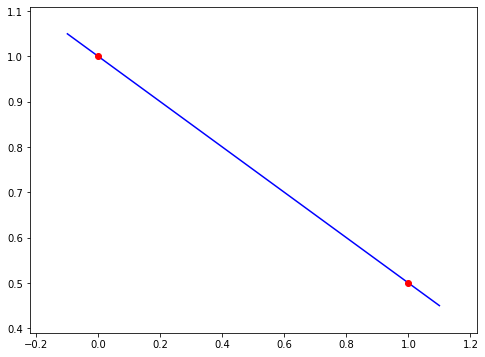

In [3]:
# confirm in a plot

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x0 = 0
y0 = 1
x1 = 1
y1 = 0.5

x = np.linspace(-0.1, 1.1, 100)

y = (1-x) + 0.5*x

ax1.plot(x, y, 'b')

ax1.plot(x0,y0,'ro')
ax1.plot(x1,y1,'ro')

 
-0.5 x + 1


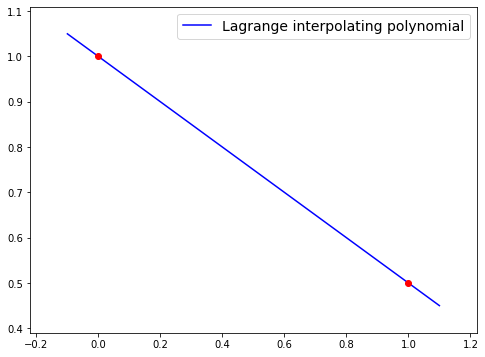

In [4]:
# repeat using scipy

xi = np.array([0, 1])
yi = np.array([1, 0.5])

# Create the Lagrange polynomial for the given points.
lp = si.lagrange(xi, yi)

print(lp)

# Evaluate this function at a high resolution (100 points here) so that 
# we get a smooth well-resolved line when we plot our polynomial
x = np.linspace(-0.1, 1.1, 100)

# set up the figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# actually plot (x,y)=(x,lp(x)) on the axes with the label ax1
ax1.plot(x, lp(x), 'b', label='Lagrange interpolating polynomial')

ax1.plot(x0,y0,'ro')
ax1.plot(x1,y1,'ro')

# Add a legend
ax1.legend(loc='best', fontsize=14);

In the case with three data points  $\{(0,1), (0.4,0.1), (1,0.5)\}$

The Lagrange basis polynomials are then

$$ \ell_0(x) = \frac{(x - x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} = \frac{(x - 0.4)(x-1)}{(-0.4)(-1)} =  \frac{(x - 0.4)(x-1)}{0.4} $$

$$\ell_1(x) = \frac{(x - x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} = \frac{(x - 0)(x-1)}{(0.4-0)(0.4-1)} = \frac{x(x-1)}{(- 0.4 \times 0.6) } $$

$$\ell_2(x) = \frac{(x - x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} = \frac{(x - 0)(x-0.4)}{(1-0)(1-0.4)} = \frac{x(x-0.4)}{0.6} $$

and the Lagrange polynomial is

$$ y = L(x) = \ell_0(x)\,y_0 + \ell_1(x)\,y_1 + \ell_2(x)\,y_2
= 1\times \frac{(x - 0.4)(x-1)}{0.4} + 0.1\times \frac{x(x-1)}{(- 0.4 \times 0.6) } + 0.5 \times 
\frac{x(x-0.4)}{0.6} $$

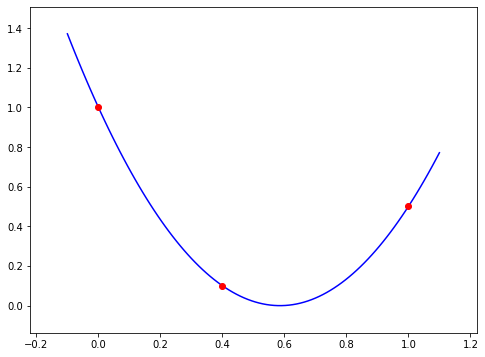

In [101]:
# let's plot this to check we're correct

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x0 = 0
y0 = 1
x1 = 0.4
y1 = 0.1
x2 = 1
y2 = 0.5

x = np.linspace(-0.1, 1.1, 100)

y = (x-0.4)*(x-1)/0.4 + 0.1*x*(x-1)/(-0.4*0.6) + 0.5*x*(x-0.4)/0.6

ax1.plot(x, y, 'b')

ax1.plot(x0,y0,'ro')
ax1.plot(x1,y1,'ro')
ax1.plot(x2,y2,'ro')

       2
2.917 x - 3.417 x + 1


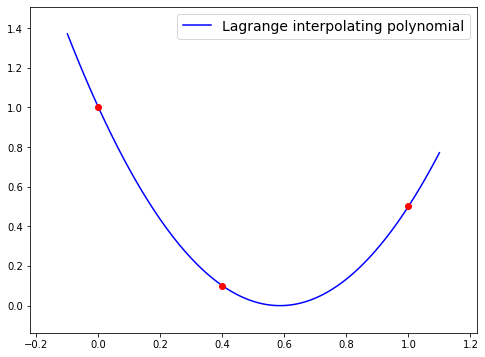

In [5]:
# repeat using scipy

xi = np.array([0, 0.4, 1])
yi = np.array([1, 0.1, 0.5])

# Create the Lagrange polynomial for the given points.
lp = si.lagrange(xi, yi)
print(lp)

# Evaluate this function at a high resolution (100 points here) so that 
# we get a smooth well-resolved line when we plot our polynomial
x = np.linspace(-0.1, 1.1, 100)

# set up the figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# actually plot (x,y)=(x,lp(x)) on the axes with the label ax1
ax1.plot(x, lp(x), 'b', label='Lagrange interpolating polynomial')

ax1.plot(xi[0],yi[0],'ro')
ax1.plot(xi[1],yi[1],'ro')
ax1.plot(xi[2],yi[2],'ro')

# Add a legend
ax1.legend(loc='best', fontsize=14);

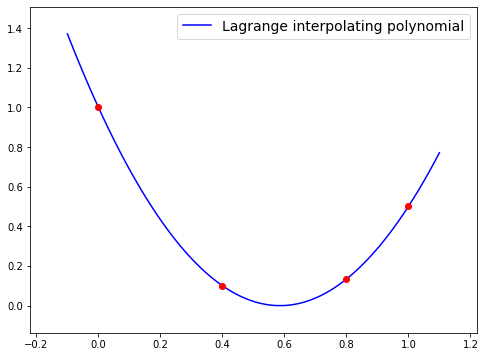

In [102]:
# 3.2
# to get 4 points that are interpolated by a quadratic (which isn't possible in general)
# we can just evaluate and quadratic at 4 distinct x points, or to be fancy let's just
# evaluate the polynomial from above at a new location:

x4 = 0.8
y4 = lp(x4)

# set up the figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# actually plot (x,y)=(x,lp(x)) on the axes with the label ax1
ax1.plot(x, lp(x), 'b', label='Lagrange interpolating polynomial')

ax1.plot(xi[0],yi[0],'ro')
ax1.plot(xi[1],yi[1],'ro')
ax1.plot(xi[2],yi[2],'ro')
ax1.plot(x4,y4,'ro')

# Add a legend
ax1.legend(loc='best', fontsize=14);

In [ ]:
#3.3
# we know that the quadratic f(x) = ax**2 + bx + c
# has roots given by the expression that contains sqrt(b**2 - 4ac)
# when b**2 - 4ac is postive we have two real roots
# when it's zero we have one (repeated) root
# when negative no real roots

In [103]:
a = 1
b = 3
c = 1

def f(x):
    return a*x**2 + b*x + c

def dfdx(x):
    return 2*a*x + b


x0 = 0 # initial guess
print(sop.newton(f, x0, dfdx))

-0.3819660112501052


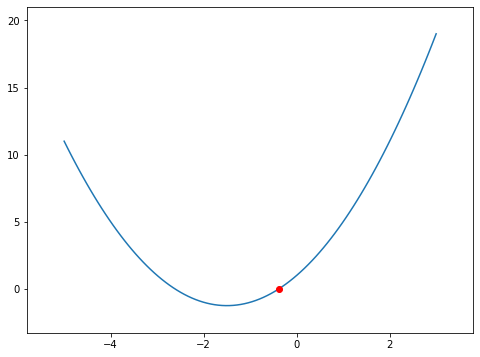

In [114]:
# set up the figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
x = np.linspace(-5, 3, 100)
ax1.plot(x, f(x))
ax1.plot(-0.3819660112501052, 0, 'ro')


In [115]:
# find the other root - clearly we should get this if we start from a smaller starting guess
x0 = -3 # initial guess
print(sop.newton(f, x0, dfdx))

-2.618033988749895


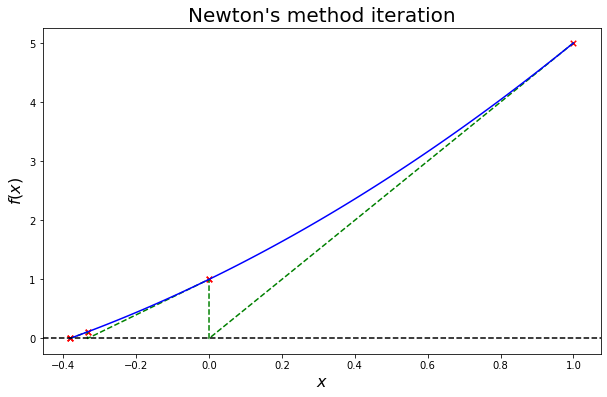

In [110]:
# we can plot what it's doing
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

def plot_newton(f, dx, x_0, atol, ax, inset=True, ixmin=3.0, ixmax=3.2, 
                iymin=-0.1, iymax=0.1, zoom=8, loc0=1, loc1=3, loc2=2, maxiter=100, resfct=100, flabel=''):
    x_n = [x_0]
    y_n = [f(x_0)]    
    
    # Newton iteration
    i = 0
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    while 1:
        # approximate gradient - computed using a dx value 
        # note comments below on quasi-newton!!
        dfdx = (f(x_n[-1]+dx) - f(x_n[-1])) / dx
        # Newton-Raphson update
        x_zero = x_n[-1] - ( f(x_n[-1]) / dfdx )
        x_n.append(x_zero)        
        y_n.append(0.)
        if abs(x_n[-1]-x_n[-2]) < atol:
            break
        x_n.append(x_zero)
        y_n.append(f(x_zero))
        i = i+1
        if i >= maxiter:
            break
        
    # the iteration results
    ax.scatter(x_n, f(np.array(x_n)), marker='x', color='red', s=30)
    
    # the convergence pattern
    ax.plot(x_n, y_n, color='green', ls='--')
        
    # the function
    x = np.linspace( np.min(x_n), np.max(x_n), resfct)
    ax.plot(x, f(x), 'b')
    
    # zero line
    xlim = ax.get_xlim()
    ax.plot([xlim[0], xlim[1]], [0., 0.], 'k--')
    ax.set_xlim(xlim)

    # zoomed inset
    if inset:
        axins = zoomed_inset_axes(ax, zoom, loc=loc0)
        axins.scatter(x_n, f(np.array(x_n)), marker='x', color='red', s=30)
        axins.plot(x_n, y_n, color='green', ls='--')
        axins.plot(x, f(x), 'b')
        axins.plot([ixmin,ixmax],[0.,0.], 'k--')
        axins.set_xlim(ixmin, ixmax)
        axins.set_ylim(iymin, iymax)
        axins.get_xaxis().set_visible(False)
        axins.get_yaxis().set_visible(False)
        mark_inset(ax, axins, loc1=loc1, loc2=loc2, fc="none", ec="0.5")
    
    ax.set_xlabel('$x$', fontsize=16)
    if not flabel:
        fl = '$f(x)$'
    else:
        fl = flabel
    ax.set_ylabel(fl, fontsize=16)
    ax.set_title("Newton's method iteration", fontsize=20)

fig, ax1 = plt.subplots(figsize=(10,6))
x0 = 1
plot_newton(f, 1.e-3, x0, 1.e-2, ax1, inset=False)


It wil go wrong if we start from a "flat" part of the function, for this quadratic we know that the the derivative is $2ax+b$, this is zero when $x = -b/2a$.

Let's try Newton at this value, and a little above and a little below:


In [117]:
a = 1
b = 3
c = 1

def f(x):
    return a*x**2 + b*x + c

def dfdx(x):
    return 2*a*x + b

x0 = -b/(2*a) # initial guess
print(sop.newton(f, x0, dfdx))

RuntimeError: Derivative was zero. Failed to converge after 1 iterations, value is -1.5.

In [119]:
# failed as expected, now perturb a little in each direction

x0 = -b/(2*a) +0.001
print(sop.newton(f, x0, dfdx))


x0 = -b/(2*a) -0.001
print(sop.newton(f, x0, dfdx))


-0.3819660112501052
-2.618033988749895


Works fine, and as expected when starting either side of this flat section it converges to either root.

### Question 4 - numerical linear algebra [25 marks]

<br>

Consider the following set of linear equations

\begin{align*}
  2x_0 + 3x_1 + x_2 + 5x_3 &= 4 \\[5pt]
  8x_0 + 16x_1 + 7x_2 + 22x_3 &= 24 \\[5pt] 
  2x_0 + 15x_1 + 13x_2 + 19x_3 &= 30 \\[5pt]
  -4x_0 + 2x_1 + 10x_2 + 11x_3 &= 13   
\end{align*}

<br>

**4.1 [12 marks]**

Write this in matrix form ($A\pmb{x}=\pmb{b}$). In explaining the steps required to perform a transformation of the $A$ matrix into upper triangular, derive by hand the $L$ and $U$ matrices in the $LU$ decomposition of $A$. Compare your answer with that obtained from code to perform $LU$ decomposition from class.  Do **not** use partial pivoting, and in your hand derivation do not perform any row swaps.

<br>

**4.2  [3 marks]**

Using the $L$ and $U$ from 4.1, solve the above linear system. Verify your answer against any other solution method available via NumPy of SciPy.

<br>

**4.3  [10 marks]**

Explain the differences between a direct and an indirect/iterative solution method. Solve the above problem using Gauss-Seidel's method and comment on the agreement between the solution you obtain with Gauss-Seidel and that obtained in part 4.2. Demonstrate how you can make this agreement arbitrarily close.


Starting from our $A$ matrix

$$
  A=\begin{bmatrix}
{\color{black}2} & {\color{black}3} & {\color{black}1} & {\color{black}5}\\
{\color{black}8} & {\color{black}16} & {\color{black}7} & {\color{black}22}\\
{\color{black}2} & {\color{black}15} & {\color{black}13} & {\color{black}19}\\
{\color{black}-4} & {\color{black}2} & {\color{black}10} & {\color{black}11}\\
    \end{bmatrix}
$$

The required row operations to transform this into upper triangular form can be encoded by 

$$
  \begin{bmatrix}
    {\color{black}1} & {\color{black}0} & {\color{black}0} & {\color{black}0}\\
    {\color{black}{-4}} & {\color{black}1} & {\color{black}0} & {\color{black}0}\\
    {\color{black}{-1}} & {\color{black}0} & {\color{black}1} & {\color{black}0}\\
    {\color{black}{2}} & {\color{black}0} & {\color{black}0} & {\color{black}1}\\   
  \end{bmatrix}\qquad\times\qquad\begin{bmatrix}
{\color{black}2} & {\color{black}3} & {\color{black}1} & {\color{black}5}\\
{\color{black}8} & {\color{black}16} & {\color{black}7} & {\color{black}22}\\
{\color{black}2} & {\color{black}15} & {\color{black}13} & {\color{black}19}\\
{\color{black}-4} & {\color{black}2} & {\color{black}10} & {\color{black}11}\\
    \end{bmatrix}\qquad=\qquad\begin{bmatrix}
    {\color{black}2} & {\color{black}3} & {\color{black}1} & {\color{black}5}\\
    {\color{black}{0}} & {\color{black}{4}} & {\color{black}{3}} & {\color{black}{2}}\\
    {\color{black}{0}} & {\color{black}{12}} & {\color{black}{12}} & {\color{black}{14}}\\
    {\color{black}{0}} & {\color{black}{8}} & {\color{black}{12}} & {\color{black}{21}}\\    
  \end{bmatrix}
$$

\begin{equation*}
  \begin{bmatrix}
    {\color{black}1} & {\color{black}0} & {\color{black}0} & {\color{black}0}\\
    {\color{black}0} & {\color{black}1} & {\color{black}0} & {\color{black}0}\\
    {\color{black}0} & {\color{black}{-3}} & {\color{black}1} & {\color{black}0}\\
    {\color{black}0} & {\color{black}{-2}} & {\color{black}0} & {\color{black}1}\\
  \end{bmatrix}\qquad\times\qquad\begin{bmatrix}
    {\color{black}2} & {\color{black}3} & {\color{black}1} & {\color{black}5}\\
    {\color{black}{0}} & {\color{black}{4}} & {\color{black}{3}} & {\color{black}{2}}\\
    {\color{black}{0}} & {\color{black}{12}} & {\color{black}{12}} & {\color{black}{14}}\\
    {\color{black}{0}} & {\color{black}{8}} & {\color{black}{12}} & {\color{black}{21}}\\    
  \end{bmatrix}\qquad=\qquad\begin{bmatrix}
    {\color{black}5} & {\color{black}7} & {\color{black}5} & {\color{black}9}\\
    {\color{black}0} & {\color{black}4} & {\color{black}3} & {\color{black}2}\\
    {\color{black}0} & {\color{black}{0}} & {\color{black}{3}} & {\color{black}{8}}\\
    {\color{black}0} & {\color{black}{0}} & {\color{black}{6}} & {\color{black}{17}}\\
  \end{bmatrix}
\end{equation*}



\begin{equation*}
  \begin{bmatrix}
    {\color{black}1} & {\color{black}0} & {\color{black}0} & {\color{black}0}\\
    {\color{black}0} & {\color{black}1} & {\color{black}0} & {\color{black}0}\\
    {\color{black}0} & {\color{black}0} & {\color{black}1} & {\color{black}0}\\
    {\color{black}0} & {\color{black}0} & {\color{black}{-2}} & {\color{black}{1}}\\
  \end{bmatrix}\qquad\times\qquad\begin{bmatrix}
    {\color{black}5} & {\color{black}7} & {\color{black}5} & {\color{black}9}\\
    {\color{black}0} & {\color{black}4} & {\color{black}3} & {\color{black}2}\\
    {\color{black}0} & {\color{black}{0}} & {\color{black}{3}} & {\color{black}{8}}\\
    {\color{black}0} & {\color{black}{0}} & {\color{black}{6}} & {\color{black}{17}}\\
  \end{bmatrix}\qquad=\qquad\begin{bmatrix}
    {\color{black}2} & {\color{black}3} & {\color{black}1} & {\color{black}5}\\
    {\color{black}0} & {\color{black}4} & {\color{black}3} & {\color{black}2}\\
    {\color{black}0} & {\color{black}0} & {\color{black}3} & {\color{black}8}\\
    {\color{black}0} & {\color{black}0} & {\color{black}{0}} & {\color{black}{1}}\\
  \end{bmatrix}
\end{equation*}



The RHS is the $U$ matrix, and from what we know in class the $L$ matrix is the inverse of the multiple of the multiplicative matrices on the left. Due to the special atomic form of these, this just entails combining the entries and swapping the signs of the off diagonals, i.e.

$$L = 
\begin{bmatrix}
    {\color{black}1} & {\color{black}0} & {\color{black}0} & {\color{black}0}\\
    {\color{black}4} & {\color{black}1} & {\color{black}0} & {\color{black}0}\\
    {\color{black}1} & {\color{black}3} & {\color{black}1} & {\color{black}0}\\
    {\color{black}-2}& {\color{black}2} & {\color{black}{2}} & {\color{black}{1}}\\
  \end{bmatrix}
$$


In [136]:
# let's check

A = np.array([[2., 3. , 1.,  5.],
              [8., 16., 7.,  22.],
              [2., 15., 13., 19.],
              [-4.,2.,  10., 11.]])

print(sl.det(A))

L = np.array([[1., 0. , 0.,  0.],
              [4., 1.,  0.,  0.],
              [1., 3.,  1.,  0.],
              [-2.,2.,  2.,  1.]])

U = np.array([[2., 3. , 1.,  5.],
              [0., 4.,  3.,  2.],
              [0., 0.,  3.,  8.],
              [0., 0.,  0.,  1.]])

# check ?A=LU
np.allclose(A, L @ U)

23.999999999999854


True

In [122]:
# see if what we computed above agrees with code

from pprint import pprint


def LU_dec(A):
    # upper triangular matrix contains gaussian elimination result
    # we won't change A in-place but create a local copy
    A = A.copy()
    m, n = A.shape
    assert(n == m)  # this is designed to work for a square matrix
    # lower triangular matrix has identity diagonal and scaling factors
    # start from the identity:
    L = np.identity(n)
    # Loop over each pivot row.
    for k in range(n):
        # Loop over each equation below the pivot row.
        for i in range(k+1, n):
            # Define the scaling factor outside the innermost
            # loop otherwise its value gets changed.
            s = (A[i,k]/A[k,k])
            for j in range(k, n):
                A[i,j] = A[i,j] - s*A[k,j]
            # scaling factors make up the lower matrix 
            L[i,k] = s
    # A now is the upper triangular matrix U
    return L, A


A = np.array([[2., 3. , 1.,  5.],
              [8., 16., 7.,  22.],
              [2., 15., 13., 19.],
              [-4.,2.,  10., 11.]])


L, U = LU_dec(A)

pprint(A)
pprint(L)
pprint(U)
np.allclose(L @ U, A)

array([[ 2.,  3.,  1.,  5.],
       [ 8., 16.,  7., 22.],
       [ 2., 15., 13., 19.],
       [-4.,  2., 10., 11.]])
array([[ 1.,  0.,  0.,  0.],
       [ 4.,  1.,  0.,  0.],
       [ 1.,  3.,  1.,  0.],
       [-2.,  2.,  2.,  1.]])
array([[2., 3., 1., 5.],
       [0., 4., 3., 2.],
       [0., 0., 3., 8.],
       [0., 0., 0., 1.]])


True

In [129]:
# 4.2

# Our RHS vector
b=np.array([4,24,30,13])

# use Scipy or Numpy to obtain a solution
x = sl.inv(A)@b
print(x)

# or
x = sl.solve(A,b)

[-4.  3. -2.  1.]


In [133]:
# We can use back and forward substitution as appropriate

# This function assumes that A is already an upper triangular matrix.
def backward_substitution(A, b):
    n = np.size(b)    
    x = np.zeros(n)
    for k in range(n-1, -1, -1):
        s = 0.
        for j in range(k+1, n):
            s = s + A[k, j]*x[j]
        x[k] = (b[k] - s)/A[k, k]    
    return x

# This function assumes that A is already a lower triangular matrix.
def forward_substitution(A, b):
    n = np.size(b)    
    x = np.zeros(n)
    for k in range(n):
        s = 0.
        for j in range(k):
            s = s + A[k, j]*x[j]
        x[k] = (b[k] - s)/A[k, k]
    
    return x



A = np.array([[2., 3. , 1.,  5.],
              [8., 16., 7.,  22.],
              [2., 15., 13., 19.],
              [-4.,2.,  10., 11.]])

b = np.array([4,24,30,13])

L, U = LU_dec(A)

y = forward_substitution(L, b)
x = backward_substitution(U, y)
print(x)

[-4.  3. -2.  1.]


In [134]:
# 4.3

def gauss_seidel(A, b, maxit=500, tol=1.e-6):
    m, n = A.shape
    x = np.zeros(A.shape[0])
    residuals = []
    for k in range(maxit):
        for i in range(m):
            x[i] = (1./A[i, i]) * (b[i] 
                                   - np.dot(A[i,:i], x[:i]) 
                                   - np.dot(A[i,i+1:], x[i+1:])) 
        residual = sl.norm(A@x - b)
        residuals.append(residual)
        if (residual < tol): break
        
    return x, residuals

[-3.9978398   2.99897447 -1.9982885   0.99941607]


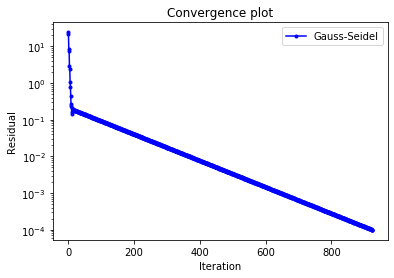

False


In [144]:
A = np.array([[2., 3. , 1.,  5.],
              [8., 16., 7.,  22.],
              [2., 15., 13., 19.],
              [-4.,2.,  10., 11.]])

b = np.array([4,24,30,13])

# an initial guess at the solution - here just a vector of zeros of length the number of rows in A
x = np.zeros(A.shape[0]) 

tol = 1.e-4 # iteration tolerance
it_max = 10000 # upper limit on iterations if we don't hit tolerance

x_gs, res_gs = gauss_seidel(A,b, it_max, tol)
print(x_gs)

# plot the log of the residual against iteration number 
fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot(111)
ax1.semilogy(res_gs,'b.-',label='Gauss-Seidel')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Residual')
ax1.set_title('Convergence plot')
ax1.legend(loc='best')
plt.show()

# check our solutions agrees with multiplying through by the inverse matrix
# [0] as our implemntations also return the residuals
print(np.allclose(sl.inv(A)@b, gauss_seidel(A, b)[0]))


[-4.  3. -2.  1.]


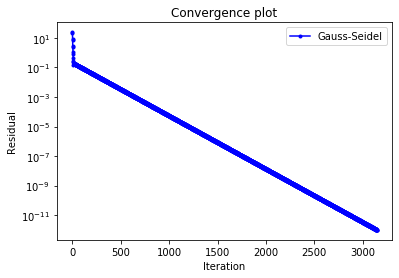

False


In [143]:
# This doesn't agree too closely with the solution from above
# let's try with tighter tolerances

A = np.array([[2., 3. , 1.,  5.],
              [8., 16., 7.,  22.],
              [2., 15., 13., 19.],
              [-4.,2.,  10., 11.]])

b = np.array([4,24,30,13])

# an initial guess at the solution - here just a vector of zeros of length the number of rows in A
x = np.zeros(A.shape[0]) 


tol = 1.e-12 # iteration tolerance
it_max = 10000 # upper limit on iterations if we don't hit tolerance

x_gs, res_gs = gauss_seidel(A,b, it_max, tol)
print(x_gs)

# plot the log of the residual against iteration number 
fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot(111)
ax1.semilogy(res_gs,'b.-',label='Gauss-Seidel')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Residual')
ax1.set_title('Convergence plot')
ax1.legend(loc='best')
plt.show()

# check our solutions agrees with multiplying through by the inverse matrix
# [0] as our implemntations also return the residuals
print(np.allclose(sl.inv(A)@b, gauss_seidel(A, b)[0]))


In [145]:
x_gs, res_gs = gauss_seidel(A,b, it_max, 1e-7)
print(x_gs)

x_gs, res_gs = gauss_seidel(A,b, it_max, 1e-8)
print(x_gs)

x_gs, res_gs = gauss_seidel(A,b, it_max, 1e-9)
print(x_gs)

x_gs, res_gs = gauss_seidel(A,b, it_max, 1e-10)
print(x_gs)

[-3.99999784  2.99999897 -1.99999829  0.99999941]
[-3.99999978  2.9999999  -1.99999983  0.99999994]
[-3.99999998  2.99999999 -1.99999998  0.99999999]
[-4.  3. -2.  1.]


So the agreement with the exact result depends on how small we choose the tolerance (and/or how many iterations we allow the algorithm to perform).